In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

data = pd.read_csv('cloud-data/bus_data_modified.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.head()

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load,stop
0,4855,4131,Transit Bus,212.735226,LX Route,02:23 PM,-74.433571,40.519749,0,67,101,402213,111417,2024-10-31 18:24:00,0.000000,Quads
1,4859,4177,Transit Bus,128.232575,LX Route,02:23 PM,-74.436304,40.524327,27,67,102,402325,111417,2024-10-31 18:24:00,0.402985,Livingston Student Center
2,4873,4191,Transit Bus,240.802514,B Route,02:23 PM,-74.457712,40.523463,8,67,101,402329,113278,2024-10-31 18:24:00,0.119403,NaN
3,4876,4194,Transit Bus,299.246496,B Route,02:23 PM,-74.438946,40.521624,4,67,102,402330,113250,2024-10-31 18:24:00,0.059701,NaN
4,17624,4002,Heavy Duty Transit LF,226.694476,REXB Route,02:23 PM,-74.438830,40.483538,2,68,102,402643,112511,2024-10-31 18:24:00,0.029412,NaN


In [19]:
from random import choice

one_bus = int(choice(data['name'].unique()))
one_bus_data = data[data['name'] == one_bus]
one_bus_data.head()

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load,stop
26,4843,1012,Transit Bus,297.258811,LX Route,02:23 PM,-74.449093,40.504080,7,71,101,411189,111421,2024-10-31 18:24:00,0.098592,Student Activities Center (NB)
74,4843,1012,Transit Bus,297.258811,LX Route,02:24 PM,-74.449308,40.504134,10,71,101,411189,111421,2024-10-31 18:24:31,0.140845,Student Activities Center (NB)
122,4843,1012,Transit Bus,299.058600,LX Route,02:24 PM,-74.451046,40.505099,10,71,102,411189,111421,2024-10-31 18:25:01,0.140845,NaN
169,4843,1012,Transit Bus,315.074701,LX Route,02:25 PM,-74.452662,40.506625,10,71,102,411189,111421,2024-10-31 18:25:32,0.140845,NaN
216,4843,1012,Transit Bus,302.319281,LX Route,02:26 PM,-74.458066,40.508006,10,71,102,411189,111421,2024-10-31 18:26:02,0.140845,NaN


In [3]:
one_bus_data['routeName'].unique()

array(['F Route'], dtype=object)

In [4]:
one_bus_data.describe()

,id,name,calculatedCourse,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load
count,3416.0,3416.0,3416.000000,3416.000000,3416.000000,3416.000000,3416.0,3416.000000,3416.0,3416.000000,3416,3416.000000
mean,4840.0,1004.0,185.921055,-74.442237,40.492074,10.153689,69.0,101.531030,411187.0,117893.284543,2024-11-05 14:53:32.735655936,0.147155
min,4840.0,1004.0,0.484799,-74.458881,40.480672,0.000000,69.0,101.000000,411187.0,117891.000000,2024-10-31 18:24:00,0.000000
25%,4840.0,1004.0,116.088792,-74.447825,40.483293,3.000000,69.0,101.000000,411187.0,117891.000000,2024-11-06 12:11:16.750000128,0.043478
50%,4840.0,1004.0,167.752023,-74.439561,40.489035,7.000000,69.0,102.000000,411187.0,117895.000000,2024-11-06 20:01:05,0.101449
75%,4840.0,1004.0,290.046993,-74.437603,40.499916,14.000000,69.0,102.000000,411187.0,117895.000000,2024-11-07 13:51:25.500000,0.202899
max,4840.0,1004.0,359.875236,-74.434383,40.524732,66.000000,69.0,102.000000,411187.0,117895.000000,2024-11-07 21:51:49,0.956522
std,0.0,0.0,98.449978,0.005571,0.008685,10.676616,0.0,0.499109,0.0,1.979945,NaN,0.154734


C:\Users\akash\AppData\Local\Temp\ipykernel_23276\487932898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['time_diff'] = one_bus_data['timestamp'].diff().dt.total_seconds()
C:\Users\akash\AppData\Local\Temp\ipykernel_23276\487932898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['lat_diff'] = one_bus_data['latitude'].diff()
C:\Users\akash\AppData\Local\Temp\ipykernel_23276\487932898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

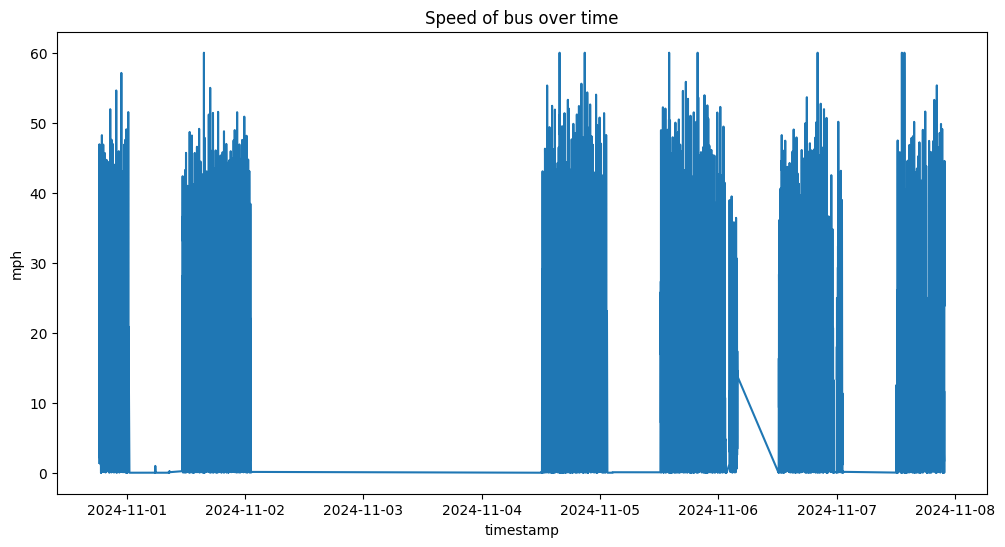

In [22]:
# convert the difference in longitude and latitude to miles per hour
# use difference in timestamp to calculate time
one_bus_data['time_diff'] = one_bus_data['timestamp'].diff().dt.total_seconds()
one_bus_data['lat_diff'] = one_bus_data['latitude'].diff()
one_bus_data['long_diff'] = one_bus_data['longitude'].diff()
one_bus_data['lat_miles'] = one_bus_data['lat_diff'] * 69
one_bus_data['long_miles'] = one_bus_data['long_diff'] * 53
one_bus_data['total_miles'] = (one_bus_data['lat_miles'] ** 2 + one_bus_data['long_miles'] ** 2) ** 0.5
one_bus_data['mph'] = one_bus_data['total_miles'] / one_bus_data['time_diff'] * 3600

# make all values of mph above 60 equal to 60
one_bus_data['mph'] = one_bus_data['mph'].apply(lambda x: 60 if x > 60 else x)

# plot the speed of the bus over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='mph', data=one_bus_data)


plt.title('Speed of bus over time')
plt.show()

In [23]:
one_bus_data.describe()

,id,name,calculatedCourse,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load,time_diff,lat_diff,long_diff,lat_miles,long_miles,total_miles,mph
count,8086.0,8086.0,8086.000000,8086.000000,8086.000000,8086.000000,8086.0,8086.000000,8086.0,8086.000000,8086,8086.000000,8085.000000,8085.000000,8.085000e+03,8085.000000,8085.000000,8085.000000,8085.000000
mean,4843.0,1012.0,174.886091,-74.445903,40.513857,15.450284,71.0,100.139253,411189.0,111451.188350,2024-11-04 16:53:44.205416960,0.217610,76.347434,0.000002,8.408040e-07,0.000164,0.000045,0.114152,12.690536
min,4843.0,1012.0,0.458356,-74.465830,40.499042,0.000000,71.0,21.000000,411189.0,111394.000000,2024-10-31 18:24:00,0.000000,30.000000,-0.015882,-1.758080e-02,-1.095858,-0.931782,0.000000,0.000000
25%,4843.0,1012.0,103.339431,-74.452081,40.503475,5.000000,71.0,101.000000,411189.0,111394.000000,2024-11-01 21:15:58.750000128,0.070423,31.000000,-0.000542,-6.126000e-04,-0.037412,-0.032468,0.011802,1.299173
50%,4843.0,1012.0,149.200854,-74.447868,40.516891,11.000000,71.0,102.000000,411189.0,111403.000000,2024-11-05 12:38:39,0.154930,32.000000,-0.000001,9.100000e-06,-0.000076,0.000482,0.072740,8.080073
75%,4843.0,1012.0,279.090277,-74.438439,40.523807,22.000000,71.0,102.000000,411189.0,111421.000000,2024-11-06 15:51:15.750000128,0.309859,33.000000,0.000537,9.295000e-04,0.037025,0.049263,0.177691,19.779196
max,4843.0,1012.0,359.488444,-74.430742,40.526522,64.000000,71.0,102.000000,411189.0,113251.000000,2024-11-07 21:51:49,0.901408,212169.000000,0.007222,1.780160e-02,0.498318,0.943485,1.107543,60.000000
std,0.0,0.0,96.965998,0.007692,0.010080,14.482333,0.0,10.683096,0.0,271.190152,NaN,0.203977,2461.263667,0.001828,2.098436e-03,0.126137,0.111217,0.123481,13.615614


In [25]:
# calculate the change in load over time
one_bus_data['load_diff'] = one_bus_data['load'].diff()

C:\Users\akash\AppData\Local\Temp\ipykernel_23276\1176286829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['load_diff'] = one_bus_data['load'].diff()


In [29]:
# plot the change in load over time
limited = one_bus_data[one_bus_data['timestamp'] > '2024-11-04' & one_bus_data['timestamp'] < '2024-11-06']

plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='load_diff', data=limited)
plt.title('Change in load over time')
plt.show()

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

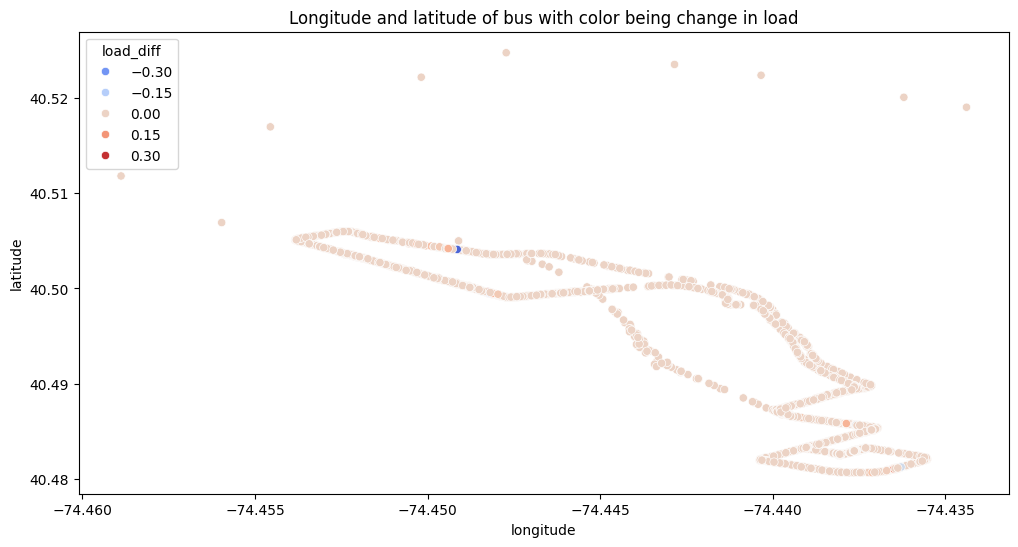

In [8]:
# plot longitude and latitude of bus with color being change in load
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='load_diff', data=one_bus_data, palette='coolwarm')
plt.title('Longitude and latitude of bus with color being change in load')
plt.show()

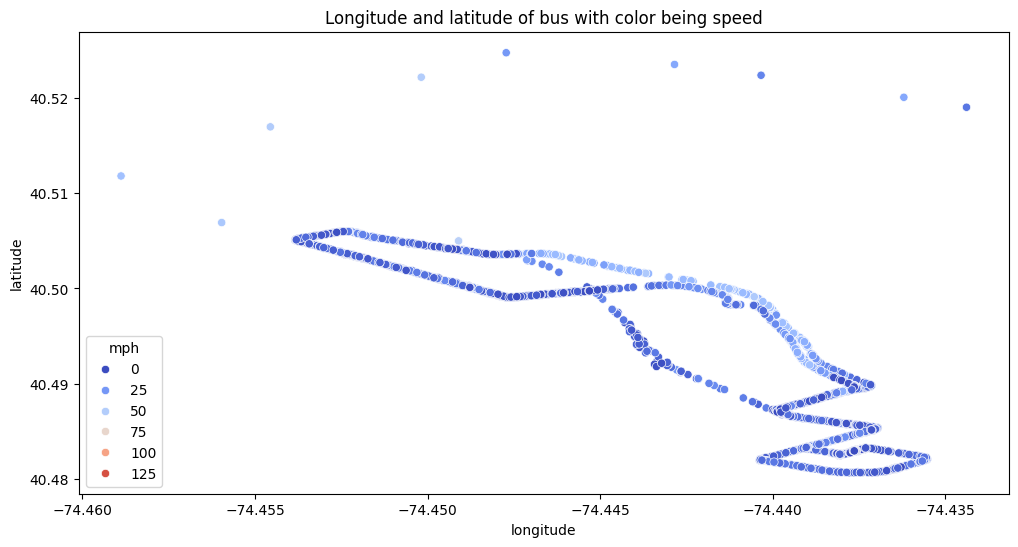

In [9]:
# graph all the places with 0 mph in color and everywhere else in black
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='mph', data=one_bus_data, palette='coolwarm')
plt.title('Longitude and latitude of bus with color being speed')
plt.show()

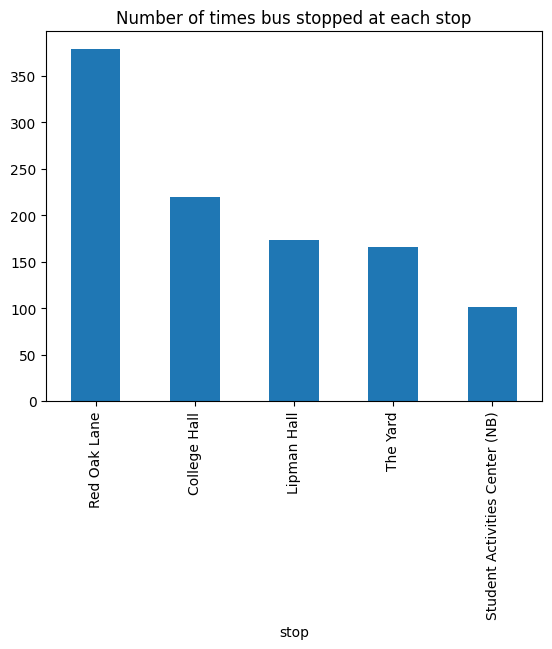

In [10]:
# make a bar graph of the stops
one_bus_data['stop'].value_counts().plot(kind='bar')
plt.title('Number of times bus stopped at each stop')
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_23276\1207899318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['not_moving'] = one_bus_data['mph'] < 0.1
C:\Users\akash\AppData\Local\Temp\ipykernel_23276\1207899318.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['time_waiting'] = one_bus_data['not_moving'].cumsum() * 5


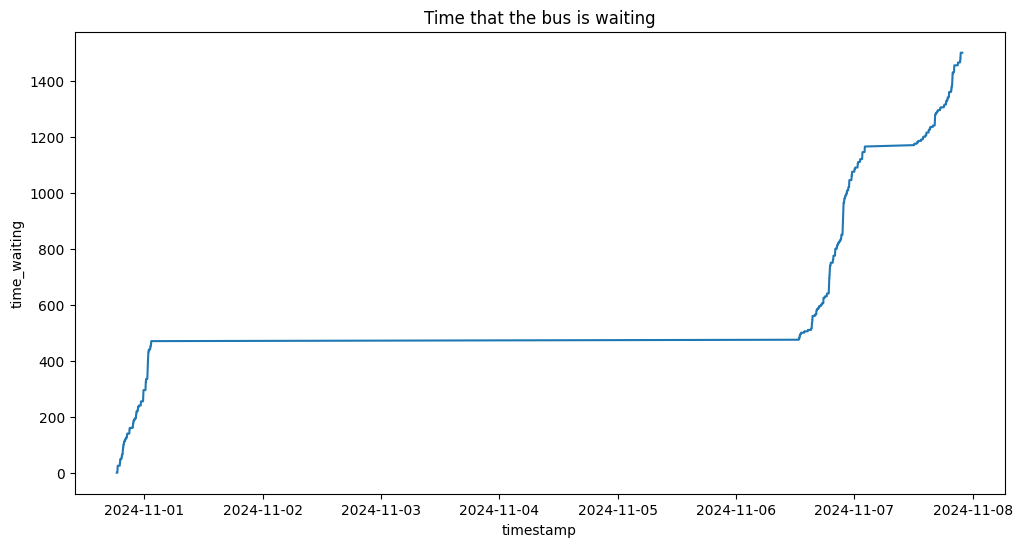

In [11]:
# get the time periods when the bus is not moving
one_bus_data['not_moving'] = one_bus_data['mph'] < 0.1

# calculate the time that the bus is waiting
one_bus_data['time_waiting'] = one_bus_data['not_moving'].cumsum() * 5

# plot the time that the bus is waiting
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='time_waiting', data=one_bus_data)
plt.title('Time that the bus is waiting')
plt.show()

In [12]:
# limit the data to when it is running one specific route
route = one_bus_data['routeName'].unique()[0]
one_bus_data = one_bus_data[one_bus_data['routeName'] == route]

C:\Users\akash\AppData\Local\Temp\ipykernel_23276\3518540220.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(limited['time_diff_stop'].dropna())


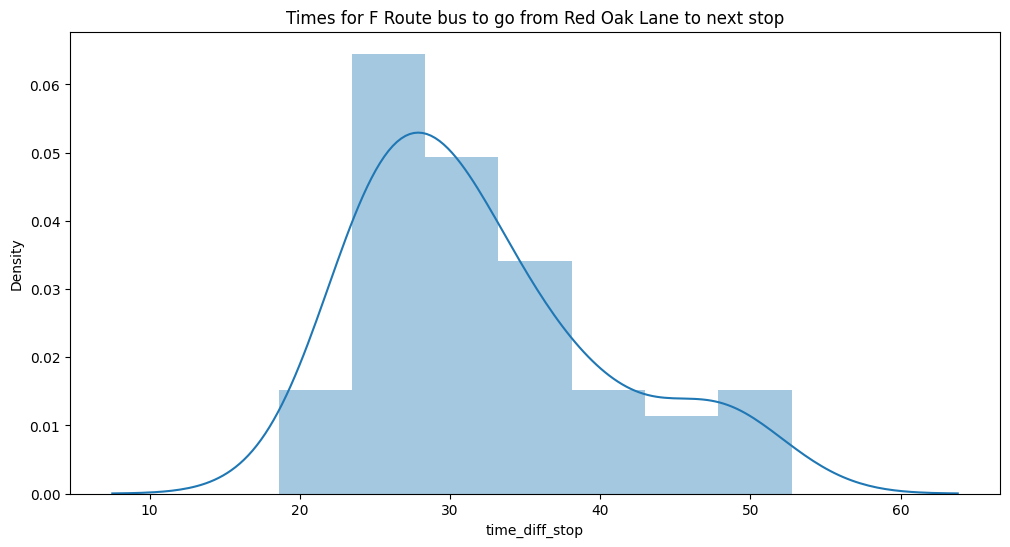

In [13]:
# measure the amount of time it takes for the bus to go from one stop to the next
stop = one_bus_data['stop'].unique()[0]

if type(stop) == float:
    stop = one_bus_data['stop'].unique()[1]

# make limited data which is each row of data where the bus is at the stop and went to another stop previously
# remove na stop rows
limited_total = one_bus_data.dropna(subset=['stop'])

# create new limited dataframe to add data to
limited = pd.DataFrame(columns=limited_total.columns)

en_route = False
for i in range(1, len(limited_total)):
    if limited_total.iloc[i]['stop'] == stop and en_route == True:
        limited = pd.concat([limited, limited_total.iloc[i].to_frame().T])
        en_route = False
    elif limited_total.iloc[i]['stop'] != stop:
        en_route = True


limited['time_diff_stop'] = limited['timestamp'].diff().dt.total_seconds() / 60

limited = limited[limited['time_diff_stop'] < 300]

# plot the distribution of the time it takes for the bus to go from one stop to the next
plt.figure(figsize=(12, 6))
sns.distplot(limited['time_diff_stop'].dropna())
plt.title(f'Times for {route} bus to go from {stop} to next stop')
plt.show()

In [14]:
limited

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,paxLoad,totalCap,...,lat_diff,long_diff,lat_miles,long_miles,total_miles,mph,load_diff,not_moving,time_waiting,time_diff_stop
7254,4840,1004,Transit Bus,47.069675,F Route,03:39 PM,-74.437392,40.483138,61,69,...,0.00036,0.000897,0.024854,0.04753,0.053636,6.228729,-0.072464,False,85,40.783333
11269,4840,1004,Transit Bus,189.306097,F Route,04:21 PM,-74.437859,40.482686,7,69,...,0.000063,0.000189,0.004375,0.010022,0.010935,1.312252,-0.072464,False,125,41.833333
14564,4840,1004,Transit Bus,49.665469,F Route,04:55 PM,-74.437389,40.483138,4,69,...,0.00044,0.000831,0.030381,0.044017,0.053483,6.210938,0.014493,False,140,34.233333
19282,4840,1004,Transit Bus,131.270957,F Route,05:44 PM,-74.43762,40.482873,22,69,...,-0.000011,0.000844,-0.000773,0.044758,0.044765,5.198536,0.0,False,175,48.583333
24418,4840,1004,Transit Bus,107.257231,F Route,06:37 PM,-74.43741,40.483117,7,69,...,0.000376,0.000876,0.025978,0.046439,0.053211,6.179359,0.0,False,220,52.733333
27987,4840,1004,Transit Bus,51.295141,F Route,07:14 PM,-74.437716,40.482807,14,69,...,-0.000189,0.000951,-0.013041,0.050429,0.052088,6.250609,0.0,False,240,37.416667
30341,4840,1004,Transit Bus,48.093401,F Route,07:41 PM,-74.437598,40.482977,4,69,...,0.000267,0.000621,0.018395,0.032929,0.037719,4.380241,0.0,False,255,26.683333
32824,4840,1004,Transit Bus,109.793565,F Route,08:11 PM,-74.437571,40.483022,2,69,...,0.000385,0.000506,0.026531,0.026792,0.037705,4.378622,0.0,False,295,30.266667
36348,4840,1004,Transit Bus,122.950294,F Route,08:59 PM,-74.437898,40.482675,5,69,...,-0.000629,0.001166,-0.043401,0.061819,0.075533,9.063981,0.0,False,440,48.250000
283789,4840,1004,Transit Bus,82.940167,F Route,07:24 AM,-74.437669,40.482924,4,69,...,0.00029,0.000467,0.020024,0.02473,0.03182,3.471278,-0.028986,False,475,18.583333


In [15]:
# load stops json
stops = pd.read_json('data/stops.json')

len(stops)

26